<a href="https://colab.research.google.com/github/kushshah777/MachineLearningAssignment2/blob/master/Architecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt



Using TensorFlow backend.


Initialize parameters


In [0]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
X_folds = np.array_split(x_train, 5)
print(X_folds[4].shape)
y_folds = np.array_split(y_train, 5)
scores = list()

# We use 'list' to copy, in order to 'pop' later on
X_train = list(X_folds)
X_val = X_train.pop(4)
X_train = np.concatenate(X_train)
y_train = list(y_folds)
y_val = y_train.pop(4)
y_train = np.concatenate(y_train)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

#Code to reshape train and test images 
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
(10000, 32, 32, 3)
40000
40000
10000
10000


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

datagen.fit(X_train)
for e in range(10):
    batches = 0
    for x_batch, y_batch in datagen.flow(X_train, y_train, batch_size=40000):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= 1:
            break


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
40000/40000 [==============================] - 19s 466us/step - loss: 1.9173 - acc: 0.2957
Epoch 1/1
40000/40000 [==============================] - 15s 369us/step - loss: 1.6328 - acc: 0.4004
Epoch 1/1
40000/40000 [==============================] - 15s 376us/step - loss: 1.5074 - acc: 0.4499
Epoch 1/1
40000/40000 [==============================] - 14s 351us/step - loss: 1.4247 - acc: 0.4855
Epoch 1/1
40000/40000 [==============================] - 14s 361us/step - loss: 1.3668 - acc: 0.5105
Epoch 1/1
40000/40000 [==============================] - 16s 388us/step - loss: 1.3156 - acc: 0.5312
Epoch 1/1
40000/40000 [==============================] - 15s 373us/step - loss: 1.2730 - acc: 0.5444
Epoch 1/1
40000/40000 [==============================] - 1

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 20s 494us/step - loss: 1.0298 - acc: 0.6376 - val_loss: 0.9477 - val_acc: 0.6706
Epoch 2/100
40000/40000 [==============================] - 16s 399us/step - loss: 0.9955 - acc: 0.6499 - val_loss: 0.9139 - val_acc: 0.6797
Epoch 3/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.9628 - acc: 0.6616 - val_loss: 0.8971 - val_acc: 0.6841
Epoch 4/100
40000/40000 [==============================] - 18s 447us/step - loss: 0.9251 - acc: 0.6784 - val_loss: 0.8643 - val_acc: 0.6945
Epoch 5/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.9007 - acc: 0.6860 - val_loss: 0.8533 - val_acc: 0.7047
Epoch 6/100
40000/40000 [==============================] - 16s 395us/step - loss: 0.8785 - acc: 0.6952 - val_loss: 0.8393 - val_acc: 0.7056
Epoch 7/100
40000/40000 [==============================] - 18s 455us/step - loss: 0.8528 - acc: 0.7025 - val_l

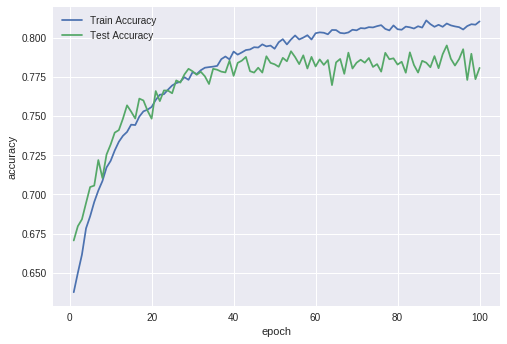

validation loss: 0.6694548795700074
validation accuracy: 0.7807


In [0]:
modelhistory = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,                    
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(modelhistory.history)
plotaccuracy = plt.plot(range(1,epochs+1),modelhistory.history['acc'],range(1,epochs+1),modelhistory.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)

print('validation loss:',modelhistory.history['val_loss'][-1])
print('validation accuracy:',modelhistory.history['val_acc'][-1])
